# Aprendizaje automático relacional

In [22]:
# Librerias

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/rozemberczki/musae-github-social-network/data

In [4]:
# Datos
edges = pd.read_csv("../data/musae_git_edges.csv")
features = pd.read_csv("../data/musae_git_features.csv")
target = pd.read_csv("../data/musae_git_target.csv")

In [5]:
edges.head()

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [6]:
features.head()

,node,feature
0,0,1574
1,0,3773
2,0,3571
3,0,2672
4,0,2478


In [7]:
target.head()

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## EDA

### Construcción del grafo

In [30]:
Data = open('../data/musae_git_edges.csv', "r")

next(Data, None)  # skip the first line in the input file

G = nx.parse_edgelist(Data, delimiter=',', create_using=nx.Graph(), nodetype=int)

### Métricas del grafo

Distribución de grados

             degree
count  37700.000000
mean      15.331724
std       80.788102
min        1.000000
25%        2.000000
50%        6.000000
75%       13.000000
max     9458.000000


<Axes: ylabel='Count'>

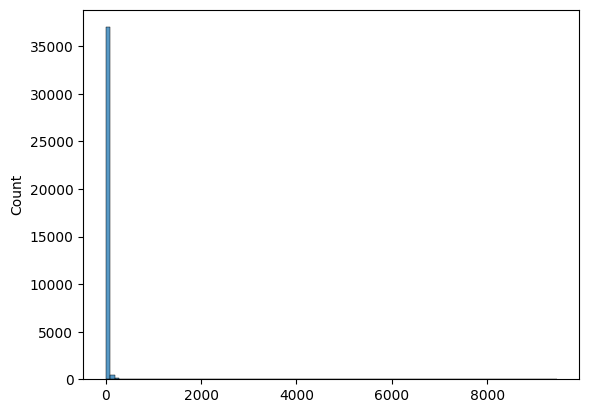

In [55]:
degrees = [G.degree(n) for n in G.nodes()]
print(pd.DataFrame(degrees,columns=["degree"]).describe())
sns.histplot(degrees,bins=100)

Distribución de clustering

         clustering
count  37700.000000
mean       0.167537
std        0.225168
min        0.000000
25%        0.000000
50%        0.100000
75%        0.226316
max        1.000000


<Axes: ylabel='Count'>

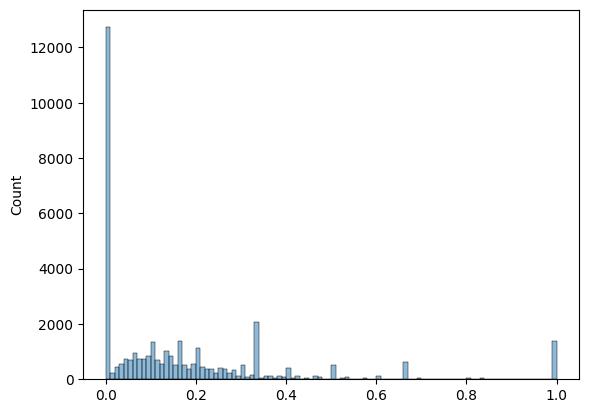

In [56]:
clustering = nx.clustering(G)
print(pd.DataFrame.from_dict(clustering,orient="index",columns=["clustering"]).describe())
sns.histplot(clustering.values(),bins=100,legend=False)

Clustering medio

In [57]:
global_cluster = nx.average_clustering(G, count_zeros=True)
global_cluster

0.1675370448010758

In [ ]:
nx.average_shortest_path_length(G)

## Aprendizaje automático relacional: 3 enfoques

### Aprendizaje automático relacional con extracción manual de características

In [9]:
target

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1
...,...,...,...
37695,37695,shawnwanderson,1
37696,37696,kris-ipeh,0
37697,37697,qpautrat,0
37698,37698,Injabie3,1


### Aprendizaje automático con extracción automática de características (node2vect)

### Graph Neuronal Networks 